In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from knetworks import knetworks
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
centers = 7
samples = 300
X, _ = make_blobs(n_samples=samples, centers=centers, n_features=2, cluster_std=1, random_state=2)
scaler = StandardScaler()
X = scaler.fit_transform(X)

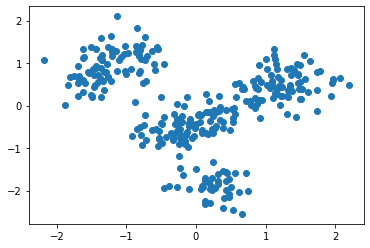

In [3]:
plt.scatter(X[:, 0], X[:,-1])

In [4]:
knet = knetworks(centers,X)
knet.k

7

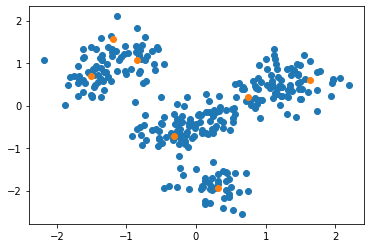

In [5]:
plt.scatter(X[:, 0], X[:,-1])
plt.scatter(knet.centroids[:,0], knet.centroids[:,-1])

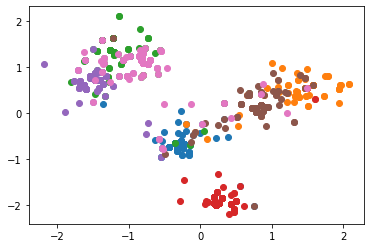

In [6]:
for k in range(knet.k):
    p = np.array([knet.sampleRandom(k) for i in range(100)]) # get Random Training Sample for centroid 0
    plt.scatter(X[p,0], X[p,-1])